### TASK 1



### 1.Read the Image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
image = cv2.imread('testimage.jpeg')


### 2.Display the image

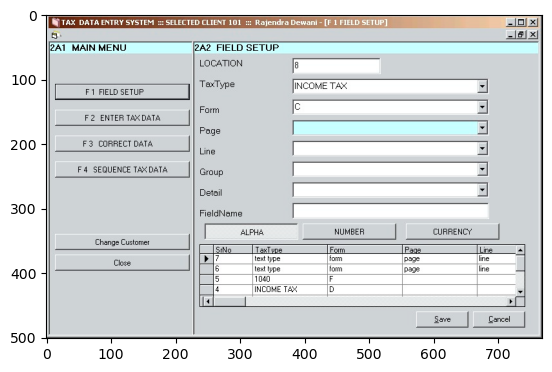

In [4]:
plt.imshow(image)
plt.show()

### 3.Cropping Objects
### 4.Assign a Name

### 5.Saving Coordinates and Cropped Object

In [6]:
import cv2
import os


cropping = False
x_start, y_start, x_end, y_end = 0, 0, 0, 0


cropped_objects = []


def draw_rectangle(event, x, y, flags, param):
    global x_start, y_start, x_end, y_end, cropping

    if event == cv2.EVENT_LBUTTONDOWN:
        x_start, y_start, x_end, y_end = x, y, x, y
        cropping = True

    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping:
            x_end, y_end = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        x_end, y_end = x, y
        cropping = False

        x_start, x_end = min(x_start, x_end), max(x_start, x_end)
        y_start, y_end = min(y_start, y_end), max(y_start, y_end)

        cv2.rectangle(image_copy, (x_start, y_start),
                      (x_end, y_end), (0, 255, 0), 2)
        cv2.imshow('Image', image_copy)


image_path = 'testimage.jpeg'
image = cv2.imread(image_path)

if image is not None:

    image_copy = image.copy()

    cv2.namedWindow('Image')
    cv2.setMouseCallback('Image', draw_rectangle)

    while True:

        cv2.imshow('Image', image_copy)
        key = cv2.waitKey(1) & 0xFF

        if key == 13:
            cropped_name = input("Enter a name for the cropped object: ")

            cropped = image[y_start:y_end, x_start:x_end]

            coordinates = (x_start, y_start, x_end - x_start, y_end - y_start)
            cropped_objects.append((cropped_name, coordinates, cropped))

            cv2.rectangle(image_copy, (x_start, y_start),
                          (x_end, y_end), (0, 0, 0), 2)
            cv2.imshow('Image', image_copy)

        elif key == ord('q'):
            break

    cv2.destroyAllWindows()

    for name, coordinates, cropped in cropped_objects:

        cv2.imwrite(f'{name}.jpg', cropped)
        print(f"Saved: {name}, Coordinates: {coordinates}")
else:
    print(f"Failed to load the image from {image_path}. Please check the file path and image format.")

Saved: button, Coordinates: (17, 92, 238, 176)


### 6.Repeat the Process
### 7.Closing the Image
### 8.Saving Coordinates

In [1]:
import cv2
import os

cropping = False
x_start, y_start, x_end, y_end = 0, 0, 0, 0

cropped_objects = []
image_info = []

def draw_rectangle(event, x, y, flags, param):
    global x_start, y_start, x_end, y_end, cropping

    if event == cv2.EVENT_LBUTTONDOWN:
        x_start, y_start, x_end, y_end = x, y, x, y
        cropping = True

    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping:
            x_end, y_end = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        x_end, y_end = x, y
        cropping = False

        x_start, x_end = min(x_start, x_end), max(x_start, x_end)
        y_start, y_end = min(y_start, y_end), max(y_start, y_end)

        cv2.rectangle(image_copy, (x_start, y_start),
                      (x_end, y_end), (0, 255, 0), 2)
        cv2.imshow('Image', image_copy)

image_path = 'testimage.jpeg'
image = cv2.imread(image_path)

if image is not None:

    image_copy = image.copy()

    cv2.namedWindow('Image')
    cv2.setMouseCallback('Image', draw_rectangle)

    while True:

        cv2.imshow('Image', image_copy)
        key = cv2.waitKey(1) & 0xFF

        if key == 13:
            cropped_name = input("Enter a name for the cropped object: ")

            cropped = image[y_start:y_end, x_start:x_end]

            coordinates = (x_start, y_start, x_end - x_start, y_end - y_start)
            cropped_objects.append((cropped_name, coordinates, cropped))
            image_info.append((cropped_name, image_path, *coordinates))

            cv2.rectangle(image_copy, (x_start, y_start),
                          (x_end, y_end), (0, 0, 0), 2)
            cv2.imshow('Image', image_copy)

        elif key == ord('q'):
            break

    cv2.destroyAllWindows()

    for name, coordinates, cropped in cropped_objects:
        cv2.imwrite(f'{name}.jpg', cropped)
        print(f"Saved: {name}, Coordinates: {coordinates}")

    
    with open('coordinates.txt', 'w') as f:
        for item in image_info:
            f.write(','.join(str(e) for e in item) + '\n')

else:
    print(f"Failed to load the image from {image_path}. Please check the file path and image format.")


Saved: mainMenu, Coordinates: (8, 83, 229, 224)
Saved: fieldSetup, Coordinates: (240, 60, 494, 287)


Saved: quit, Coordinates: (13, 332, 217, 72)
